In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
df_saz_transp = pd.read_csv('C:\\Users\\victo\\OneDrive\\Documentos\\github\\tcc-analise-setores-mercado-financeiro\\data\\df_sazonalidade_transp.csv', index_col=0)
display(df_saz_transp)

,2013-01-02,2013-01-03,2013-01-04,2013-01-07,2013-01-08,2013-01-09,2013-01-10,2013-01-11,2013-01-14,2013-01-15,...,2023-09-18,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-25,2023-09-26,2023-09-27,2023-09-28,2023-09-29
"Exploração, Refino e Distribuição",0.138235,0.145734,0.147882,0.136597,0.141709,0.124323,0.115168,0.100448,0.055850,0.033191,...,0.160344,0.146272,0.115163,0.101600,0.109301,0.094410,0.129480,0.128696,0.126953,0.138235
Equipamentos e Serviços,0.034587,0.035004,0.034631,0.034685,0.034685,0.034720,0.034882,0.034760,0.034782,0.034794,...,0.035111,0.034942,0.034908,0.035164,0.034893,0.034906,0.034783,0.034926,0.034758,0.034587
Minerais Metálicos,0.357693,0.361658,0.403189,0.386001,0.350346,0.320515,0.303426,0.278000,0.299648,0.271825,...,0.322769,0.323417,0.338303,0.345547,0.294242,0.270589,0.292421,0.312619,0.341572,0.357693
Siderurgia,0.373453,0.368914,0.378966,0.365475,0.385712,0.373419,0.373116,0.355398,0.347835,0.327482,...,0.361725,0.357260,0.350624,0.356543,0.344958,0.343815,0.363294,0.370910,0.374120,0.373453
Artefatos de Ferro e Aço,0.182385,0.180910,0.140273,0.145007,0.144049,0.142716,0.141363,0.139996,0.138630,0.137263,...,0.206981,0.205401,0.203940,0.202479,0.197863,0.196402,0.194938,0.193453,0.183859,0.182385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Corretoras de Seguros e Resseguros,-0.187836,-0.178782,-0.159304,-0.156624,-0.161724,-0.163177,-0.153137,-0.161350,-0.155340,-0.154723,...,-0.084027,-0.094792,-0.100111,-0.124333,-0.139100,-0.146519,-0.134299,-0.151118,-0.170983,-0.187836
Exploração de Imóveis,0.159437,0.153411,0.147845,0.134553,0.129375,0.129465,0.136902,0.129394,0.129595,0.127652,...,0.246525,0.238264,0.223734,0.224974,0.279816,0.256458,0.234625,0.203674,0.211157,0.159437
Intermediação Imobiliária,-0.029311,-0.035630,-0.039252,-0.043367,-0.047804,-0.054721,-0.050000,-0.053899,-0.055093,-0.056109,...,-0.012896,-0.013788,-0.019824,-0.022773,-0.022434,-0.023484,-0.030065,-0.021891,-0.024516,-0.029311
Holdings Diversificadas,0.209340,0.189490,0.202696,0.186361,0.246610,0.243580,0.279257,0.276910,0.273852,0.274297,...,0.438775,0.394291,0.370157,0.346046,0.272356,0.155558,0.214726,0.232849,0.217922,0.209340


Defindo o número de clusters

In [8]:
distortions = []
n_clusters = range(2,15)
for n_clus in n_clusters:
    distortions.append(KMeans(n_clusters=n_clus,max_iter=10_000,n_init=100, random_state=61658).fit(df_saz_transp).inertia_ )

c:\Users\victo\OneDrive\Documentos\github\tcc-analise-setores-mercado-financeiro\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\victo\OneDrive\Documentos\github\tcc-analise-setores-mercado-financeiro\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


In [9]:
df_delta_dist = pd.DataFrame(columns=['k','delta_dist'])

for distortion in range(1,len(distortions)):
    delta_dist = 1-(distortions[distortion]/distortions[distortion-1])
    df_delta_dist = pd.concat([df_delta_dist, pd.DataFrame({'k': [distortion+2], 'delta_dist': [delta_dist]})], ignore_index=True)

df_delta_dist.set_index('k', inplace=True)
# display(df_delta_dist)

C:\Users\victo\AppData\Local\Temp\ipykernel_428\388250124.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_delta_dist = pd.concat([df_delta_dist, pd.DataFrame({'k': [distortion+2], 'delta_dist': [delta_dist]})], ignore_index=True)


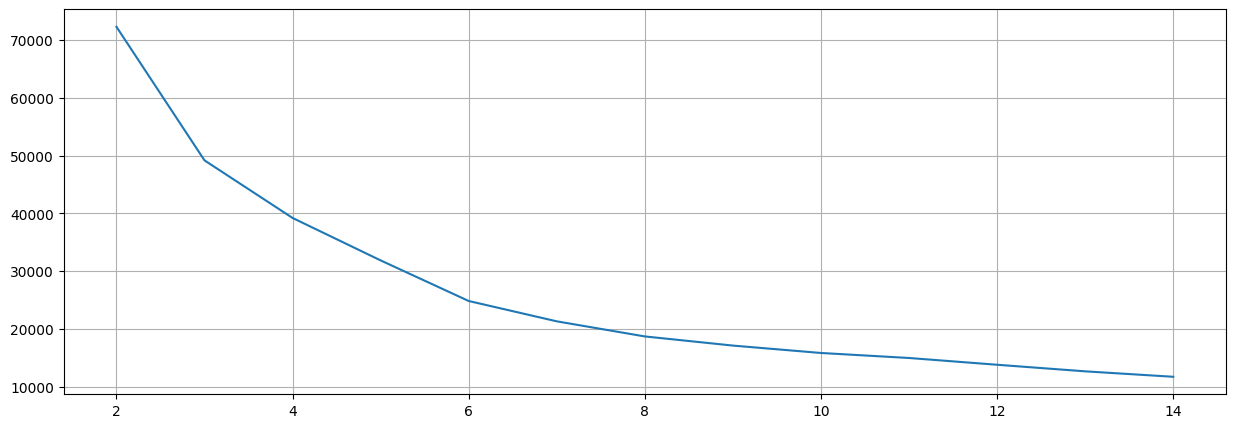

In [10]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters, distortions)
plt.grid()

Os melhores candidatos ao 

In [6]:
km = KMeans(n_clusters=6,max_iter=10_000,n_init=100, random_state=61658)
list_clusters = km.fit_predict(df_saz_transp)
list_clusters

array([0, 0, 0, 0, 0, 0, 2, 0, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 5, 0, 0, 5, 5, 5, 5, 0, 5, 0, 0,
       5, 4, 5, 0, 5, 5, 5, 4, 0, 0, 0, 0, 5])

In [7]:
df_saz_transp.loc[:,'clusters'] = list_clusters
df_saz_transp

,2013-01-02,2013-01-03,2013-01-04,2013-01-07,2013-01-08,2013-01-09,2013-01-10,2013-01-11,2013-01-14,2013-01-15,...,2023-09-19,2023-09-20,2023-09-21,2023-09-22,2023-09-25,2023-09-26,2023-09-27,2023-09-28,2023-09-29,clusters
"Exploração, Refino e Distribuição",0.138235,0.145734,0.147882,0.136597,0.141709,0.124323,0.115168,0.100448,0.055850,0.033191,...,0.146272,0.115163,0.101600,0.109301,0.094410,0.129480,0.128696,0.126953,0.138235,0
Equipamentos e Serviços,0.034587,0.035004,0.034631,0.034685,0.034685,0.034720,0.034882,0.034760,0.034782,0.034794,...,0.034942,0.034908,0.035164,0.034893,0.034906,0.034783,0.034926,0.034758,0.034587,0
Minerais Metálicos,0.357693,0.361658,0.403189,0.386001,0.350346,0.320515,0.303426,0.278000,0.299648,0.271825,...,0.323417,0.338303,0.345547,0.294242,0.270589,0.292421,0.312619,0.341572,0.357693,0
Siderurgia,0.373453,0.368914,0.378966,0.365475,0.385712,0.373419,0.373116,0.355398,0.347835,0.327482,...,0.357260,0.350624,0.356543,0.344958,0.343815,0.363294,0.370910,0.374120,0.373453,0
Artefatos de Ferro e Aço,0.182385,0.180910,0.140273,0.145007,0.144049,0.142716,0.141363,0.139996,0.138630,0.137263,...,0.205401,0.203940,0.202479,0.197863,0.196402,0.194938,0.193453,0.183859,0.182385,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Corretoras de Seguros e Resseguros,-0.187836,-0.178782,-0.159304,-0.156624,-0.161724,-0.163177,-0.153137,-0.161350,-0.155340,-0.154723,...,-0.094792,-0.100111,-0.124333,-0.139100,-0.146519,-0.134299,-0.151118,-0.170983,-0.187836,0
Exploração de Imóveis,0.159437,0.153411,0.147845,0.134553,0.129375,0.129465,0.136902,0.129394,0.129595,0.127652,...,0.238264,0.223734,0.224974,0.279816,0.256458,0.234625,0.203674,0.211157,0.159437,0
Intermediação Imobiliária,-0.029311,-0.035630,-0.039252,-0.043367,-0.047804,-0.054721,-0.050000,-0.053899,-0.055093,-0.056109,...,-0.013788,-0.019824,-0.022773,-0.022434,-0.023484,-0.030065,-0.021891,-0.024516,-0.029311,0
Holdings Diversificadas,0.209340,0.189490,0.202696,0.186361,0.246610,0.243580,0.279257,0.276910,0.273852,0.274297,...,0.394291,0.370157,0.346046,0.272356,0.155558,0.214726,0.232849,0.217922,0.209340,0


In [11]:
df_clusters = pd.DataFrame(columns=["segmento",'clusters'])
df_clusters["segmento"] = df_saz_transp.index
df_clusters["clusters"] = list_clusters
df_clusters.set_index("segmento", inplace=True)
df_clusters

,clusters
segmento,
"Exploração, Refino e Distribuição",0
Equipamentos e Serviços,0
Minerais Metálicos,0
Siderurgia,0
Artefatos de Ferro e Aço,0
...,...
Corretoras de Seguros e Resseguros,0
Exploração de Imóveis,0
Intermediação Imobiliária,0


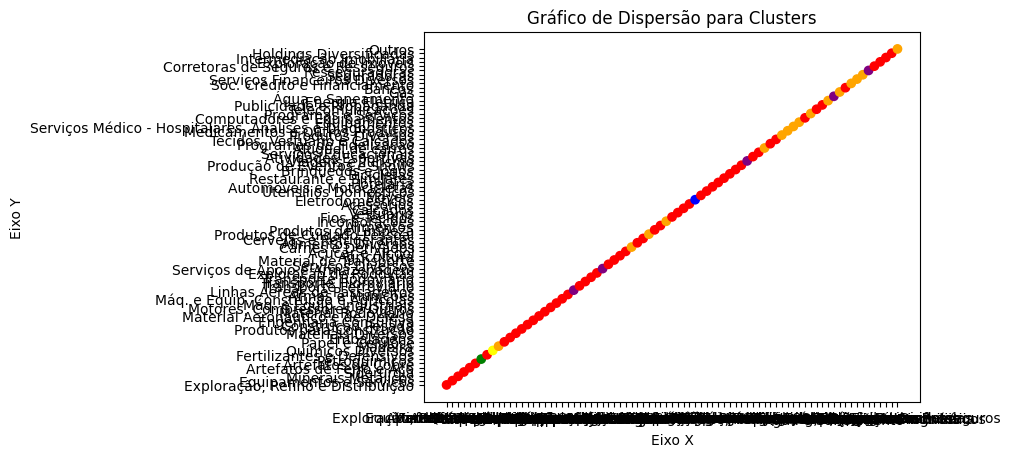

In [12]:
import matplotlib.pyplot as plt

# Dados de exemplo
x = df_clusters.index
y = df_clusters.index
clusters = df_clusters["clusters"]

# Mapeamento de clusters para cores
colors = {0: 'red', 
          1: 'blue',
          2: 'green',
          3: 'yellow',
          4: 'purple',
          5: 'orange'}

# Gerar o gráfico de dispersão
plt.scatter(x, y, c=[colors[cluster] for cluster in clusters])

# Configurar rótulos e título
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico de Dispersão para Clusters')

# Mostrar o gráfico
plt.show()

Análise de Correlação entre os clusters

In [ ]:

df_clusters_transp = df_clusters.transpose()